<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP2/7506R_TP2_GRUPO24_BAYES_NAIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 𝔾𝕣𝕦𝕡𝕠 𝟚𝟜 (Merequetengue👍)

  ➢ Torraca Lautaro - 108813

  ➢ Negrotti Gianluca - 108184

  ➢ Marco Tosi - 107237

## > Imports

In [ ]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform



### > Lectura y muestra de los datasets


In [ ]:
url_train = '/content/drive/MyDrive/Colab Notebooks/train_limpio.csv'
url_test = '/content/drive/MyDrive/Colab Notebooks/test_limpio.csv'

train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

In [ ]:
train.shape

(50000, 4)

In [ ]:
test.shape

(8599, 4)

In [ ]:
train.head()

,review_es,sentimiento,is_spanish,review_es_clean
0,Uno de los otros críticos ha mencionado que de...,positivo,True,critico mencionado despu ver solo oz episodio ...
1,Una pequeña pequeña producción.La técnica de f...,positivo,True,pequén pequén tecnico filmacion incuestionable...
2,Pensé que esta era una manera maravillosa de p...,positivo,True,pense manera maravilloso pasar tiempo fin sema...
3,"Básicamente, hay una familia donde un niño peq...",negativo,True,basicamente familia nino pequeno jake pensar z...
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,True,amor tiempo petter mattei pelicular visualment...


In [ ]:
test.head()

,ID,review_es,is_spanish,review_es_clean
0,60000,La mayor virtud de esta película es su existen...,True,mayor virtud peliculo hecho poder jugar topico...
1,60001,"No soy un experto cinéfilo, pero pocas veces m...",True,experto cinefilo poco vez habia tanto juego sa...
2,60002,Si no eres un incondicional del humor estilo T...,True,si incondicional humor estilo tele termina cap...
3,60003,"No sé qué está pasando, si la gente se deja ll...",True,pasar si gente dejar llevar moda si verdad gus...
4,60004,"Pero cuando amanece,y me quedo solo,siento en ...",True,amanecer quedo solo siento fondoun mar vacio s...


In [ ]:
test.isna().sum()

ID                 0
review_es          0
is_spanish         0
review_es_clean    0
dtype: int64

### Bayes Naive

 - Seteo constantes

In [ ]:
# Constantes
SEED=24
JOBS=-2

- Preparacion previa a aplicar Bayes Naive

In [ ]:
# Descargar stopwords de NLTK
nltk.download('stopwords')

# Cargar stopwords en español
spanish_stopwords = stopwords.words('spanish')

# Convertir etiquetas a numéricas
label_encoder = LabelEncoder()
train['sentimiento'] = label_encoder.fit_transform(train['sentimiento'])

# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(
    train['review_es_clean'], train['sentimiento'], test_size=0.05, random_state=SEED)

# Crear un pipeline con CountVectorizer y MultinomialNB
pipeline = make_pipeline(
    CountVectorizer(stop_words=spanish_stopwords),
    MultinomialNB()
)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Crear un pipeline con CountVectorizer y MultinomialNB
pipeline = make_pipeline(
    CountVectorizer(stop_words=spanish_stopwords),
    MultinomialNB()
)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


- Optimizacion de parametros con cross validation y random search

In [ ]:
# Definir el espacio de búsqueda para la optimización de hiperparámetros
parameters = {
    'countvectorizer__max_features': [10000],
    'countvectorizer__ngram_range': [(1, 1), (1, 2)],
    'multinomialnb__alpha': uniform(0.01, 1)  # Distribución uniforme entre 0.01 y 1.01
}

# Búsqueda aleatoria con validación cruzada
random_search = RandomizedSearchCV(pipeline, parameters, n_iter=5, cv=3, n_jobs=-1, scoring='f1', random_state=42)
random_search.fit(X_train, y_train)




RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('countvectorizer',
                                              CountVectorizer(stop_words=['de',
                                                                          'la',
                                                                          'que',
                                                                          'el',
                                                                          'en',
                                                                          'y',
                                                                          'a',
                                                                          'los',
                                                                          'del',
                                                                          'se',
                                                                          'las',
                                                                          'por',
                                                                          'un',
                                                                          'para',
                                                                          'con',
                                                                          'no',
                                                                          'una',
                                                                          'su',
                                                                          'al',
                                                                          'lo',
                                                                          'como',
                                                                          'más',
                                                                          'pero',
                                                                          'sus',
                                                                          'le',
                                                                          'ya',
                                                                          'o',
                                                                          'este',
                                                                          'sí',
                                                                          'porque', ...])),
                                             ('multinomialnb',
                                              MultinomialNB())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'countvectorizer__max_features': [10000],
                                        'countvectorizer__ngram_range': [(1, 1),
                                                                         (1,
                                                                          2)],
                                        'multinomialnb__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b4d0a982110>},
                   random_state=42, scoring='f1')

- Muestra de los mejores hiperparemtros y f1 score

In [ ]:
# Mejores parámetros y puntuación
print("Mejores parámetros:", random_search.best_params_)
print("Mejor puntuación (F1-score):", random_search.best_score_)

# Evaluar en el conjunto de prueba
y_pred = random_search.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1-score en el conjunto de prueba:", f1)


Mejores parámetros: {'countvectorizer__max_features': 10000, 'countvectorizer__ngram_range': (1, 2), 'multinomialnb__alpha': 0.16599452033620266}
Mejor puntuación (F1-score): 0.8259221453069922
F1-score en el conjunto de prueba: 0.8242862887012465


In [ ]:
# Entrenar el clasificador
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)



- Guardado del modelo con pickle

In [ ]:
# Guardar el modelo entrenado con pickle
with open('modelo_entrenado.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# Descargar el archivO
try:
    from google.colab import files
    files.download('modelo_entrenado.pkl')
except ImportError:
    print("La función de descarga solo funciona en Google Colab.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Calculo de metricas y muestra de la matriz de confunsion

In [ ]:
# Calcular métricas de evaluación
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nReporte de clasificación:")
print(report)

# Imprimir métricas individuales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Reporte de clasificación:
              precision    recall  f1-score   support

    negativo       0.81      0.86      0.84      1237
    positivo       0.86      0.80      0.83      1263

    accuracy                           0.83      2500
   macro avg       0.83      0.83      0.83      2500
weighted avg       0.83      0.83      0.83      2500

Accuracy: 0.8316
Precision: 0.8562
Recall: 0.8013
F1 Score: 0.8278


Matriz de confusión:


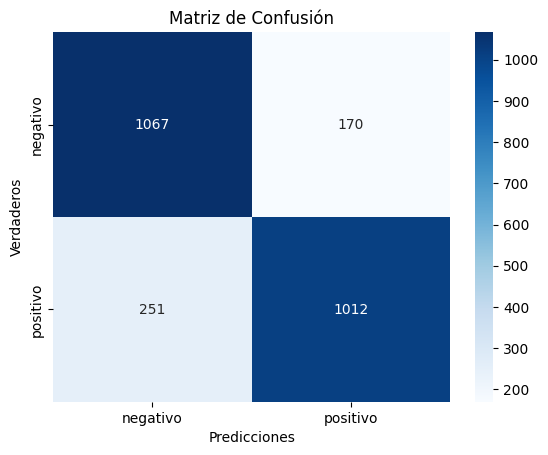

In [ ]:
# Evaluar el modelo
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

### > Prediccion con el dataset de Test

In [ ]:
test_predictions = pipeline.predict(test['review_es_clean'])

output = pd.DataFrame(zip(test["ID"], label_encoder.inverse_transform(test_predictions)),columns = ['ID','sentimiento'])

output.to_csv('prediccion_BN.csv', index=False)

# Descargar el archivo de predicciones (esto funcionará en entornos como Jupyter o Google Colab)
try:
    from google.colab import files
    files.download('prediccion_BN.csv')
except ImportError:
    print("La función de descarga solo funciona en entornos como Google Colab.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>